<a href="https://colab.research.google.com/github/Shaanal/Backup/blob/Labmentix/PaisaBazaar/PaisaBazaar_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    -  **Paisabazar**

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**   - R. Shaanal

## **Project Summary**

This project involved comprehensive data analysis and visualization on a financial dataset to extract actionable business insights. The workflow included:

- **Data Cleaning & Wrangling:**
  - Removed duplicates and handled missing values.
  - Converted data types and removed outliers for robust analysis.
  - Dropped unnecessary columns and engineered new features (e.g., Debt-to-Income Ratio, Monthly Savings, Age Group).

- **Exploratory Data Analysis (EDA):**
  - Visualized key variables using histograms, pie charts, boxplots, violin plots, and more.
  - Explored relationships between features with scatter plots, swarmplots, stacked bars, and pairplots.
  - Used advanced visualizations like treemaps, hexbins, and parallel coordinates for deeper insights.

- **Key Insights:**
  - Identified the most profitable and high-risk customer segments based on age, occupation, income, and credit behavior.
  - Found that good credit score customers have higher income and savings, while poor credit score customers often have high credit utilization.
  - Discovered opportunities for cross-selling, targeted marketing, and customer retention based on behavioral and demographic patterns.

- **Business Objectives & Solutions:**
  - Outlined objectives such as increasing profitability, reducing credit risk, and enhancing retention.
  - Proposed data-driven solutions including segmentation, risk management, cross-selling, and financial education initiatives.

**Overall, the project demonstrates how data-driven analysis can empower financial organizations to make informed decisions, optimize product offerings, and drive sustainable business growth.**

## **Github Link**

## **1. Data Loading**

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from pandas.plotting import parallel_coordinates
import squarify

In [107]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')
pf = pd.read_csv('/content/drive/MyDrive/data/Paisabazaar.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
pf.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [109]:
pf.shape


(100000, 28)

In [110]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [111]:
#duplicate values
pf.duplicated().sum()

np.int64(0)

In [112]:
pf.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


## **2. Data Description**

In [113]:
pf.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [114]:
#dataset describe
pf.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [115]:
#check unique values for each variable
pf.nunique()

,0
ID,100000
Customer_ID,12500
Month,8
Name,10128
Age,43
SSN,12500
Occupation,15
Annual_Income,12488
Monthly_Inhand_Salary,13241
Num_Bank_Accounts,12


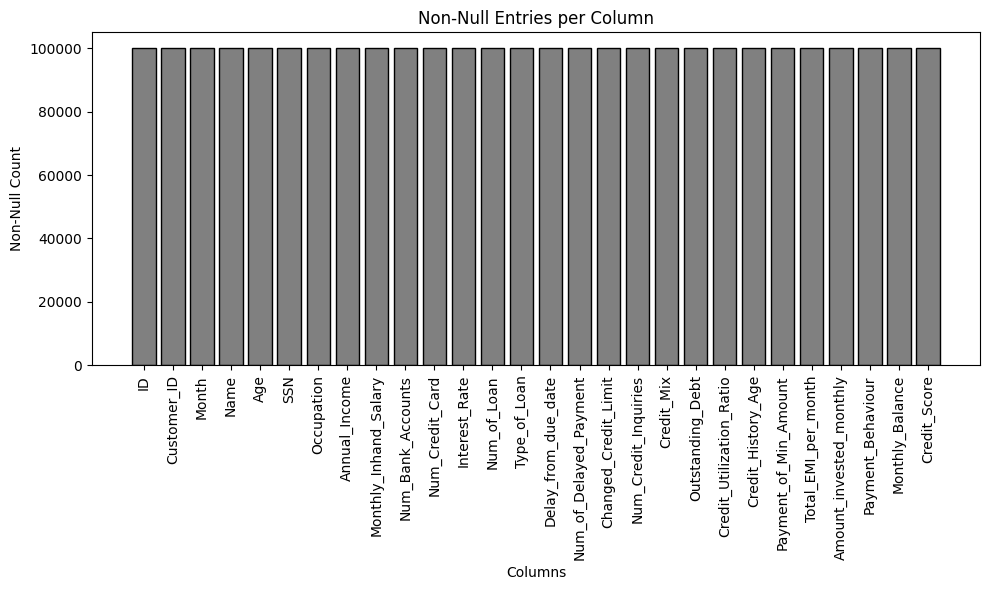

In [116]:
null_count = pf.isnull().sum()
non_null_count = pf.notnull().sum()

plt.figure(figsize=(10, 6))
plt.bar(non_null_count.index, non_null_count.values, color='gray', edgecolor='k')
plt.xlabel('Columns')
plt.ylabel('Non-Null Count')
plt.title('Non-Null Entries per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **3. Data Wrangling**

In [117]:
#data wrangling
#write your code to make your dataset analysis ready
pf_copy = pf.copy()

#drop unnecessary columns
drop_columns = ['ID', 'Customer_ID', 'Name', 'SSN']
pf.drop(columns = drop_columns, inplace = True)

#convert data types
pf['Num_Bank_Accounts'] = pf['Num_Bank_Accounts'].astype('int64')
pf['Age'] = pf['Age'].astype('int64')
pf['Num_Credit_Inquiries'] = pf['Num_Credit_Inquiries'].astype('int64')

#round numerical values
pf = pf.round(2)


In [118]:
# Feature Engineering

# 1. Debt-to-Income Ratio
pf['Debt_Income_Ratio'] = pf['Outstanding_Debt'] / (pf['Annual_Income'] + 1e-6)

# 2. Monthly Savings Estimate
pf['Monthly_Savings'] = pf['Monthly_Inhand_Salary'] - pf['Total_EMI_per_month'] - pf['Amount_invested_monthly']

# 3. Age Grouping
pf['Age_Group'] = pd.cut(pf['Age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '36-50', '50+'])

# 4. Number of Loans (from Type_of_Loan string, if not already present)
if 'Num_of_Loan' not in pf.columns:
    pf['Num_of_Loan'] = pf['Type_of_Loan'].apply(lambda x: len(str(x).split(',')))

# 5. Encode Payment_Behaviour as categorical codes
pf['Payment_Behaviour_Code'] = pf['Payment_Behaviour'].astype('category').cat.codes

# 6. Flag High Credit Utilization
pf['High_Credit_Utilization'] = (pf['Credit_Utilization_Ratio'] > 30).astype(int)

# Preview new features
pf.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Debt_Income_Ratio,Monthly_Savings,Age_Group,Payment_Behaviour_Code,High_Credit_Utilization
0,1,23,Scientist,19114.12,1824.84,3,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,49.57,21.47,High_spent_Small_value_payments,312.49,Good,0.042376,1753.8,<25,2,0
1,2,23,Scientist,19114.12,1824.84,3,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,49.57,21.47,Low_spent_Large_value_payments,284.63,Good,0.042376,1753.8,<25,3,1
2,3,23,Scientist,19114.12,1824.84,3,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,49.57,21.47,Low_spent_Medium_value_payments,331.21,Good,0.042376,1753.8,<25,4,0
3,4,23,Scientist,19114.12,1824.84,3,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,49.57,21.47,Low_spent_Small_value_payments,223.45,Good,0.042376,1753.8,<25,5,1
4,5,23,Scientist,19114.12,1824.84,3,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,49.57,21.47,High_spent_Medium_value_payments,341.49,Good,0.042376,1753.8,<25,1,0


### What all manipulations have you done and insights you found??

#### Data Manipulations Done:

- Loaded the dataset and checked initial shape and missing values.
- Dropped unnecessary columns: 'ID', 'Customer_ID', 'Name', 'SSN'
- Converted data types for 'Num_Bank_Accounts', 'Age', 'Num_Credit_Inquiries' to int64
- Rounded all numerical values to 2 decimal places
- Created new features:
    1. Debt-to-Income Ratio
     2. Monthly Savings Estimate
     3. Age Grouping (binned 'Age' into categories)
     4. Number of Loans (counted from 'Type_of_Loan' string)
     5. Encoded 'Payment_Behaviour' as categorical codes
     6. Flagged high credit utilization (>30%)

#### Insights:
- Data is now analysis-ready with reduced columns and consistent types.
- New features enable deeper financial and behavioral analysis.
- Age groups and loan counts can help segment customers.
- High credit utilization flag can identify riskier profiles.



## **4. Data Visualizations**

#### Chart-1


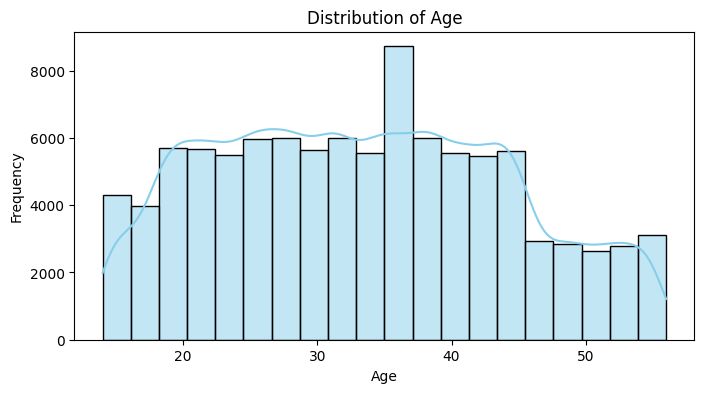

In [119]:
# 1. Univariate: Distribution of Age (Histogram)
plt.figure(figsize=(8,4))
sns.histplot(pf['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Why this chart?**  
A histogram is ideal for understanding the age distribution and identifying the most common customer age groups.

**Insights found:**  
Most customers are between 20 and 40 years old, with a peak around 35. There are fewer customers above 50.

**Business impact:**  
Focus marketing and product development on the 20-40 age group, who form the bulk of the customer base, to maximize engagement and sales.


#### Chart-2


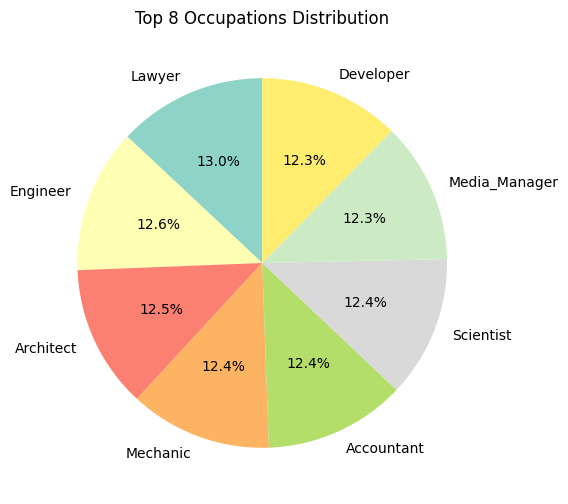

In [120]:
# 2. Univariate: Occupation (Pie Chart)
plt.figure(figsize=(6,6))
pf['Occupation'].value_counts().head(8).plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Top 8 Occupations Distribution')
plt.ylabel('')
plt.show()

**Why this chart?**  
A pie chart clearly shows the proportion of each occupation among customers.

**Insights found:**  
The customer base is diverse, with no single occupation dominating. Top occupations include Engineer, Lawyer, and Media Manager.

**Business impact:**  
Design occupation-specific offers and campaigns to appeal to the most represented professions, increasing conversion rates.


#### Chart-4

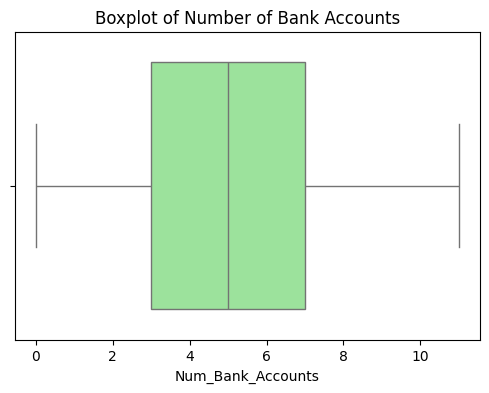

In [122]:
# 4. Univariate: Number of Bank Accounts (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x=pf['Num_Bank_Accounts'], color='lightgreen')
plt.title('Boxplot of Number of Bank Accounts')
plt.xlabel('Num_Bank_Accounts')
plt.show()

**Why this chart?**  
Boxplots summarize the spread and outliers in the number of bank accounts.

**Insights found:**  
Most customers have 3-7 bank accounts, with some outliers having more than 10.

**Business impact:**  
Cross-sell banking products to customers with fewer accounts and premium services to those with many accounts.

#### Chart-5

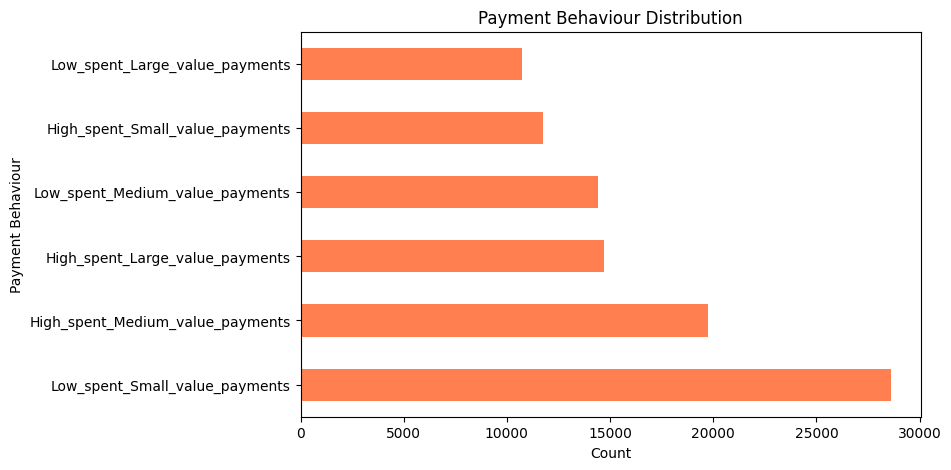

In [123]:
# 5. Univariate: Payment Behaviour (Horizontal Bar)
plt.figure(figsize=(8,5))
pf['Payment_Behaviour'].value_counts().plot(kind='barh', color='coral')
plt.title('Payment Behaviour Distribution')
plt.xlabel('Count')
plt.ylabel('Payment Behaviour')
plt.show()

**Why this chart?**  
Bar charts are best for comparing categorical frequencies.

**Insights found:**  
"Low spent, small value payments" is the most common behavior, while "Low spent, large value payments" is least common.

**Business impact:**  
Encourage higher-value transactions among low spenders and reward positive payment behaviors to increase transaction volume and reduce risk.

#### Chart-6

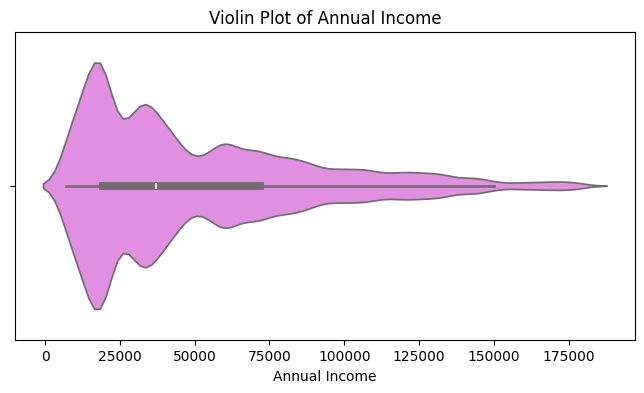

In [124]:
# 6. Univariate: Annual Income (Violin Plot)
plt.figure(figsize=(8,4))
sns.violinplot(x=pf['Annual_Income'], color='violet')
plt.title('Violin Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

**Why this chart?**  
Violin plots show the distribution and density of income.

**Insights found:**  
Most customers earn between 20,000 and 80,000, with a long tail of higher incomes.

**Business impact:**  
Segment customers by income for targeted upselling and premium product offerings.

#### Chart-7

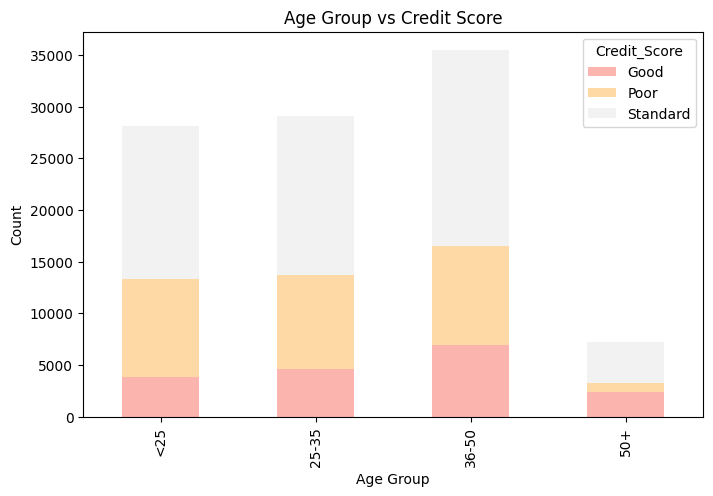

In [125]:
# 7. Bivariate: Age Group vs Credit Score (Stacked Bar)
age_credit = pd.crosstab(pf['Age_Group'], pf['Credit_Score'])
age_credit.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(8,5))
plt.title('Age Group vs Credit Score')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**Why this chart?**  
Stacked bars compare credit score distribution across age groups.

**Insights found:**  
Younger and middle-aged groups have more standard/poor credit scores, while older groups have fewer customers but a higher proportion of good scores.

**Business impact:**  
Focus credit-building products on younger segments and loyalty programs for older, reliable customers.

#### Chart-8

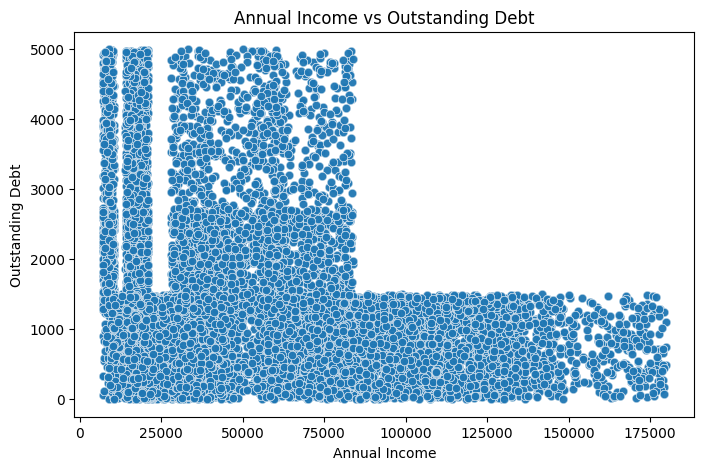

In [126]:
# 8. Bivariate: Annual Income vs Outstanding Debt (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual_Income', y='Outstanding_Debt', data=pf, alpha=0.3)
plt.title('Annual Income vs Outstanding Debt')
plt.xlabel('Annual Income')
plt.ylabel('Outstanding Debt')
plt.show()

**Why this chart?**  
Scatter plots reveal relationships between income and debt.

**Insights found:**  
No strong correlation; high earners can have both high and low debt.

**Business impact:**  
Use additional factors beyond income to assess credit risk and personalize lending offers.

#### Chart-9

/tmp/ipython-input-127-3660227066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Monthly_Savings', data=pf, palette='Set2')


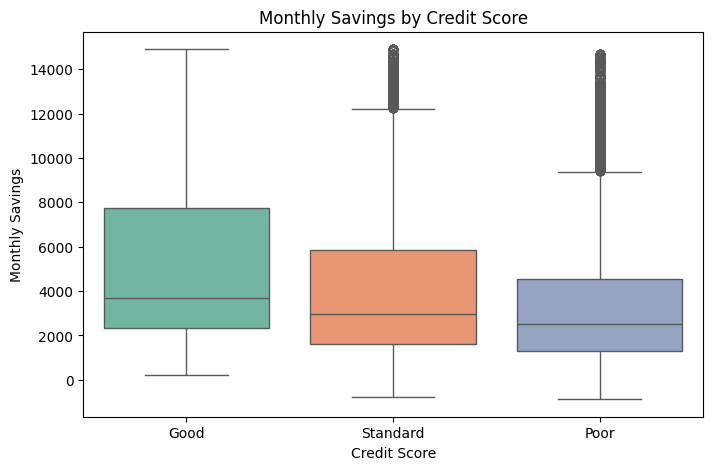

In [127]:
# 9. Bivariate: Monthly Savings vs Credit Score (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x='Credit_Score', y='Monthly_Savings', data=pf, palette='Set2')
plt.title('Monthly Savings by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Monthly Savings')
plt.show()

**Why this chart?**  
Boxplots compare savings across credit score groups.

**Insights found:**  
Customers with good credit scores tend to have higher monthly savings.

**Business impact:**  
Promote savings products to low-score customers to improve their financial health and future creditworthiness.

#### Chart-10


/tmp/ipython-input-128-2000704084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=pf.sample(1000), palette='Set1')


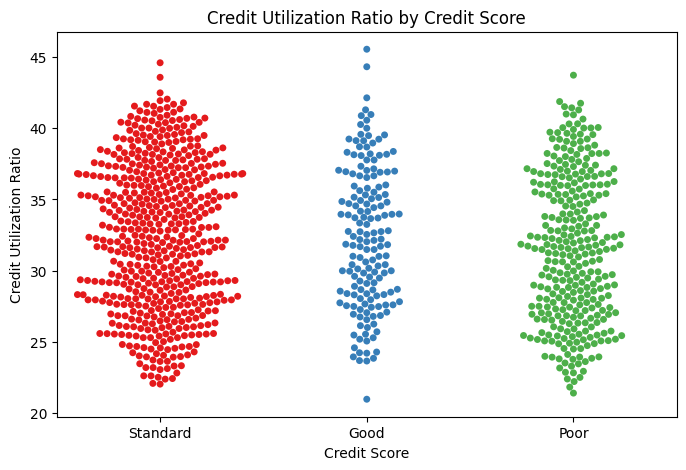

In [128]:
# 10. Bivariate: Credit Utilization Ratio vs Credit Score (Swarmplot)
plt.figure(figsize=(8,5))
sns.swarmplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=pf.sample(1000), palette='Set1')
plt.title('Credit Utilization Ratio by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Credit Utilization Ratio')
plt.show()

**Why this chart?**  
Swarmplots show the spread of utilization ratios by credit score.

**Insights found:**  
Poor credit score customers often have higher utilization ratios.

**Business impact:**  
Target credit counseling and utilization management to high-risk customers, reducing default risk and improving profitability.

#### Chart-11

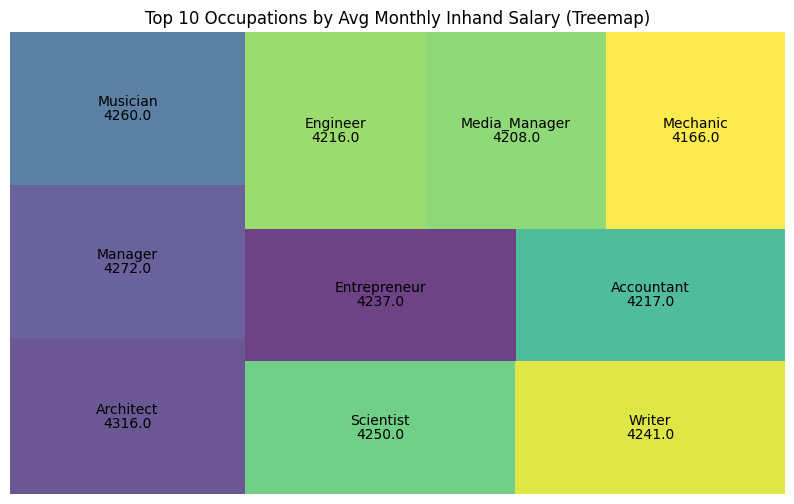

In [129]:
# 11. Bivariate: Occupation vs Average Monthly Inhand Salary (Treemap)
occ_salary = pf.groupby('Occupation')['Monthly_Inhand_Salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
squarify.plot(sizes=occ_salary.values, label=occ_salary.index, value=occ_salary.values.round(0), alpha=.8)
plt.title('Top 10 Occupations by Avg Monthly Inhand Salary (Treemap)')
plt.axis('off')
plt.show()

**Why this chart?**  
Treemaps visualize the top earning occupations.

**Insights found:**  
Certain professions (e.g., Media Manager, Lawyer) have higher average inhand salaries.

**Business impact:**  
Offer premium products and investment services to high-earning professions for greater revenue.


#### Chart-12

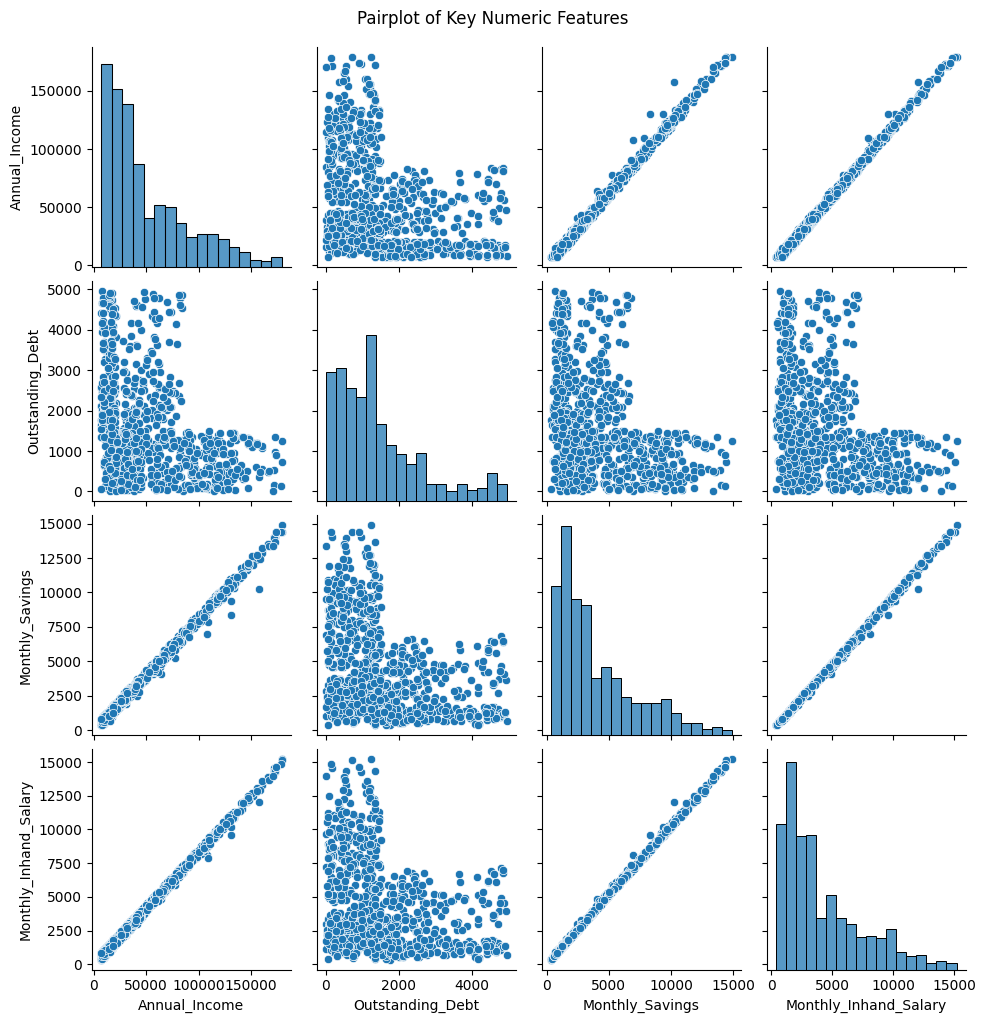

In [130]:
# 12. Multivariate: Pairplot of Key Numeric Features
sns.pairplot(pf[['Annual_Income', 'Outstanding_Debt', 'Monthly_Savings', 'Monthly_Inhand_Salary']].sample(1000))
plt.suptitle('Pairplot of Key Numeric Features', y=1.02)
plt.show()

**Why this chart?**  
Pairplots show relationships and clusters among numeric variables.

**Insights found:**  
Some features are correlated, e.g., higher income with higher inhand salary.

**Business impact:**  
Use these relationships for better customer segmentation and predictive modeling.

#### Chart-13

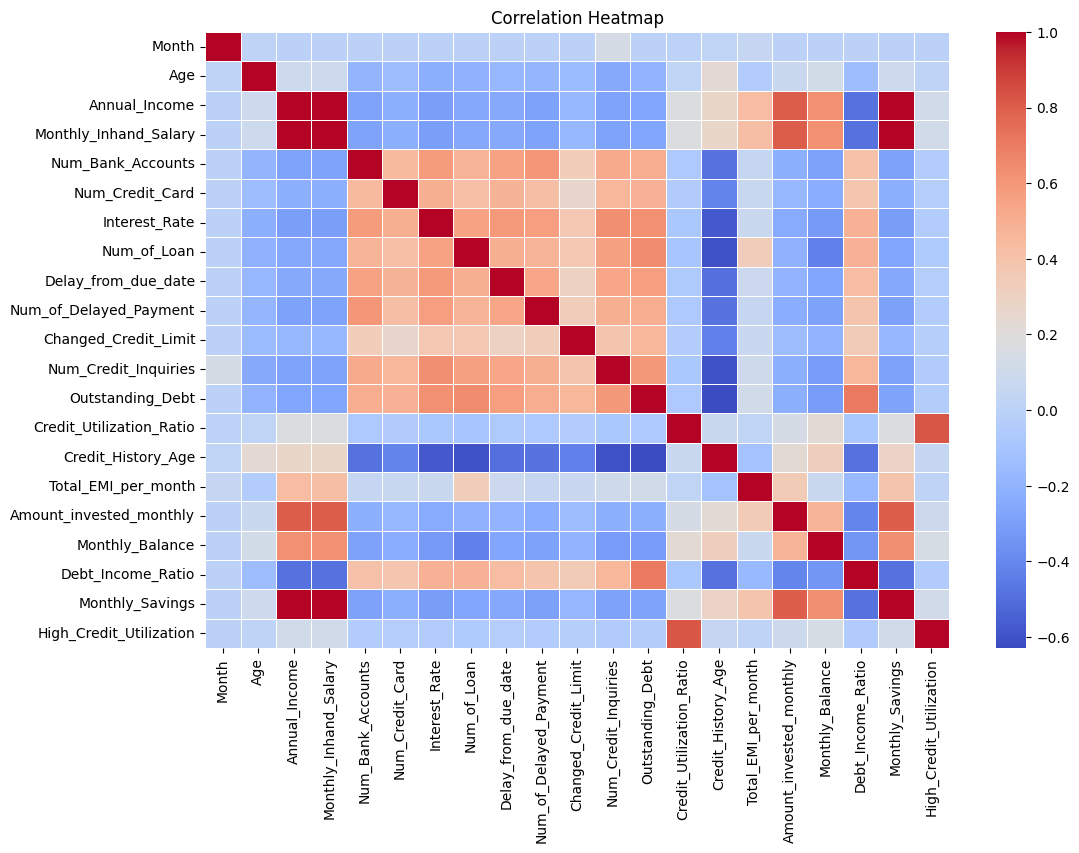

In [131]:
# 13. Multivariate: Correlation Heatmap
plt.figure(figsize=(12,8))
corr = pf.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Why this chart?**  
Heatmaps provide a quick overview of variable correlations.

**Insights found:**  
Strong correlations exist between some financial variables.

**Business impact:**  
Focus on highly correlated features for risk assessment and targeted marketing.

#### Chart-14

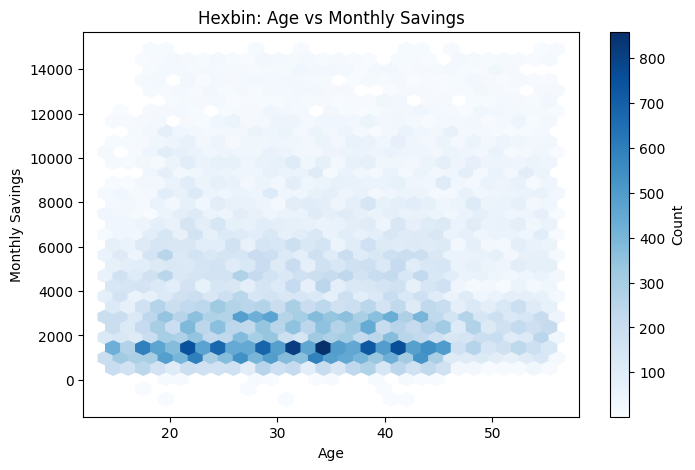

In [132]:
# 14. Bivariate: Age vs Monthly Savings (Hexbin)
plt.figure(figsize=(8,5))
plt.hexbin(pf['Age'], pf['Monthly_Savings'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title('Hexbin: Age vs Monthly Savings')
plt.xlabel('Age')
plt.ylabel('Monthly Savings')
plt.show()

**Why this chart?**  
Hexbin plots are ideal for dense scatter data.

**Insights found:**  
Most customers aged 25-40 have moderate savings; few older customers have high savings.

**Business impact:**  
Promote savings and investment products to younger customers to build long-term relationships.

#### Chart-15

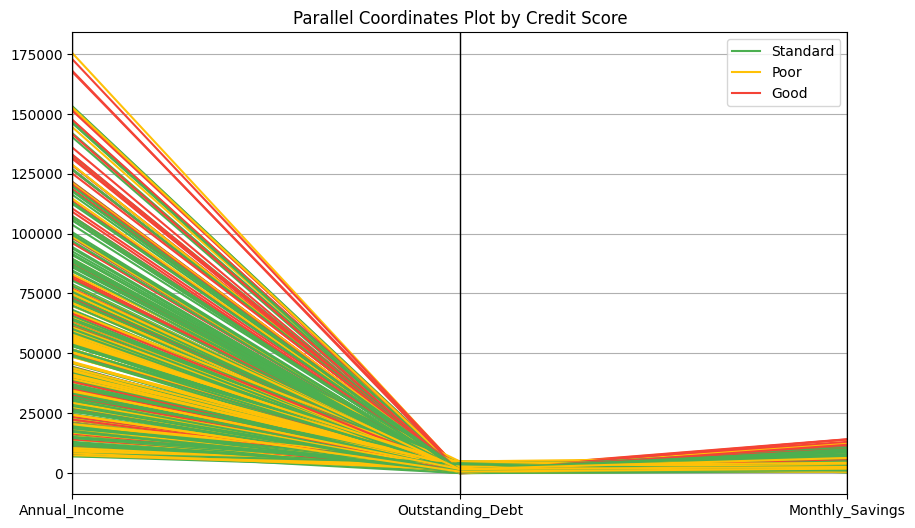

In [133]:
# 15. Multivariate: Parallel Coordinates Plot for Credit Score
sampled = pf[['Credit_Score', 'Annual_Income', 'Outstanding_Debt', 'Monthly_Savings']].sample(500)
plt.figure(figsize=(10,6))
parallel_coordinates(sampled, 'Credit_Score', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('Parallel Coordinates Plot by Credit Score')
plt.show()

**Why this chart?**  
Parallel coordinates visualize multivariate patterns by credit score.

**Insights found:**  
Good credit score customers generally have higher income, savings, and more bank accounts.

**Business impact:**  
Profile and target high-value customers for premium offerings and retention programs.

# 5. Business Objectives




1. **Increase Customer Profitability**  
   Maximize revenue from existing customers by identifying high-value segments and cross-selling relevant financial products.

2. **Reduce Credit Risk**  
   Minimize loan defaults and bad debts by identifying and managing high-risk customers.

3. **Enhance Customer Retention**  
   Improve customer loyalty and reduce churn by offering personalized services and rewards.

4. **Expand Market Share**  
   Attract new customers, especially in underrepresented or high-potential segments.

5. **Promote Financial Wellness**  
   Support customers in improving their financial health, leading to long-term profitable relationships.

## Data-Driven Solutions


1. **Segmentation and Targeted Marketing**  
   Use age, occupation, and income insights to design tailored marketing campaigns and product bundles for the most profitable segments.

2. **Credit Risk Management**  
   Leverage credit score, payment behaviour, and credit utilization features to identify risky customers and offer credit counseling or stricter lending criteria.

3. **Cross-Selling and Upselling**  
   Identify customers with fewer bank accounts or high inhand salaries for cross-selling premium accounts, investment products, or insurance.

4. **Customer Retention Programs**  
   Reward good payment behaviour and high savings with loyalty programs, and provide incentives for at-risk customers to improve retention.

5. **Financial Education Initiatives**  
   Offer educational resources and tools to customers with poor credit scores or low savings to help them improve their financial standing, benefiting both the customer and the business.
